<a href="https://colab.research.google.com/github/dotorimuk1112/DL_self_taught/blob/main/Self_taught_E(Image%20Classification%20with%20CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망 활용

In [9]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 픽셀당 255개 값으로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42) # train, test set 분할

In [10]:
model = keras.Sequential() # 객체 생성
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1))) # 모델 정의(필터: 32개 / 커널 크기: 3, 3 / 활성화함수: rely / 세임패딩)

In [11]:
model.add(keras.layers.MaxPooling2D(2))

In [12]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [13]:
from threading import active_count
model.add(keras.layers.Flatten()) #10개의 출력층에 전달하기 위해 데이터 일렬로 펼침
model.add(keras.layers.Dense(100, activation='relu')) # 100개의 뉴런을 가진 은닉층 추가
model.add(keras.layers.Dropout(0.4)) #40% 드롭아웃 시행(40% 뉴런 끄고 연산) - 은닉층의 과대적합 방지
model.add(keras.layers.Dense(10,activation='softmax')) # 출력층 추가

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

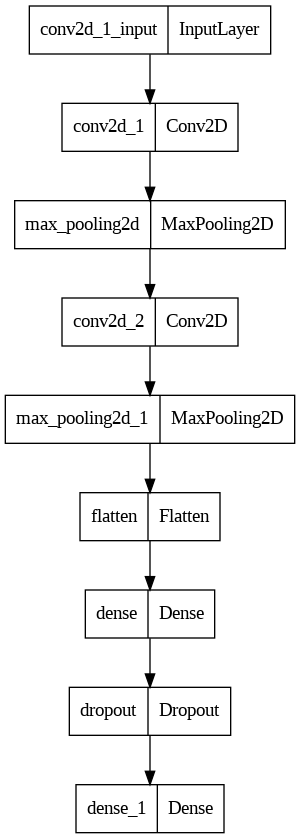

In [15]:
keras.utils.plot_model(model)

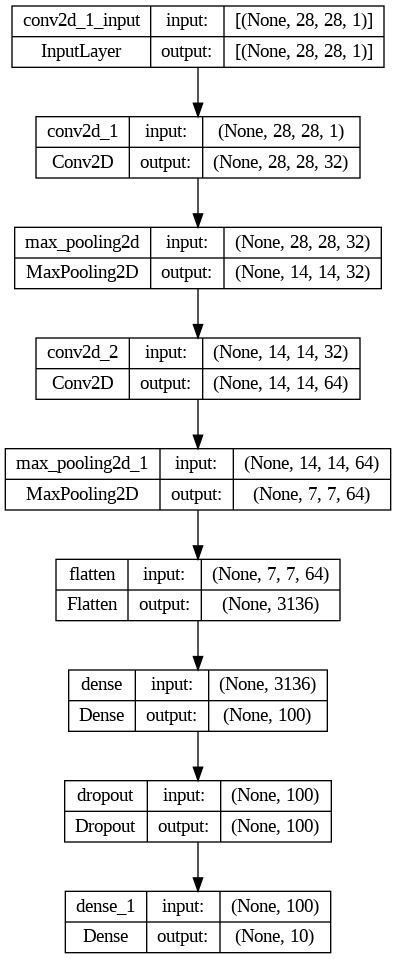

In [16]:
keras.utils.plot_model(model, show_shapes=True)

In [17]:
#@title 모델 컴파일과 훈련

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 14s 4ms/step - loss: 0.5241 - accuracy: 0.8123 - val_loss: 0.3277 - val_accuracy: 0.8775
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3529 - accuracy: 0.8733 - val_loss: 0.2926 - val_accuracy: 0.8896
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3022 - accuracy: 0.8919 - val_loss: 0.2489 - val_accuracy: 0.9068
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2665 - accuracy: 0.9028 - val_loss: 0.2505 - val_accuracy: 0.9085
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2434 - accuracy: 0.9113 - val_loss: 0.2342 - val_accuracy: 0.9139
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2252 - accuracy: 0.9184 - val_loss: 0.2264 - val_accuracy: 0.9161
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2082 - accuracy: 0.9237 - val_loss: 0.2260 - val_accuracy

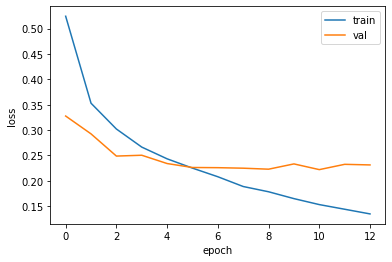

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2222 - accuracy: 0.9255


[0.22220061719417572, 0.9254999756813049]

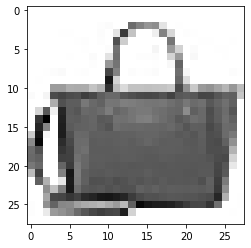

In [22]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [23]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 136ms/step
[[1.6174832e-26 1.4815605e-32 2.1648945e-33 6.9700323e-30 2.4809818e-28
  7.2230268e-26 6.6657495e-26 1.6543103e-29 1.0000000e+00 4.7393831e-25]]


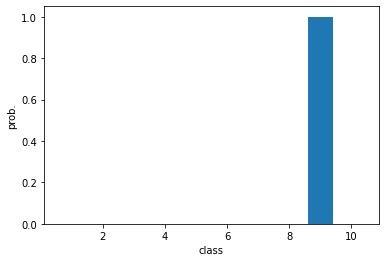

In [24]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [25]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [26]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [27]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [28]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2524 - accuracy: 0.9183


[0.2523883879184723, 0.9182999730110168]